In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [3]:
file_path = "KBZ_Pay_Sentiment_Cate_Ver3.csv"

# 1. LOAD DATA
try:
    df = pd.read_csv(file_path, encoding='utf-8-sig', on_bad_lines='skip', engine='python')
except Exception as e:
    print(f"Error loading file: {e}")
    sys.exit()

In [4]:
# 2. FEATURE CREATION
# Create a single 'Language_Type' column from the dummy variables
def determine_language(row):
    if row['Lang_Burmese'] == True:
        return 'Burmese'
    elif row['Lang_English'] == True:
        return 'English'
    elif row['Lang_Mixed'] == True:
        return 'Mixed'
    else:
        return 'Other'

df['Language_Type'] = df.apply(determine_language, axis=1)

In [5]:
# 3. CALCULATE DATA POINTS
language_counts = df['Language_Type'].value_counts()
language_avg_rating = df.groupby('Language_Type')['Rating'].mean().round(2).reset_index()

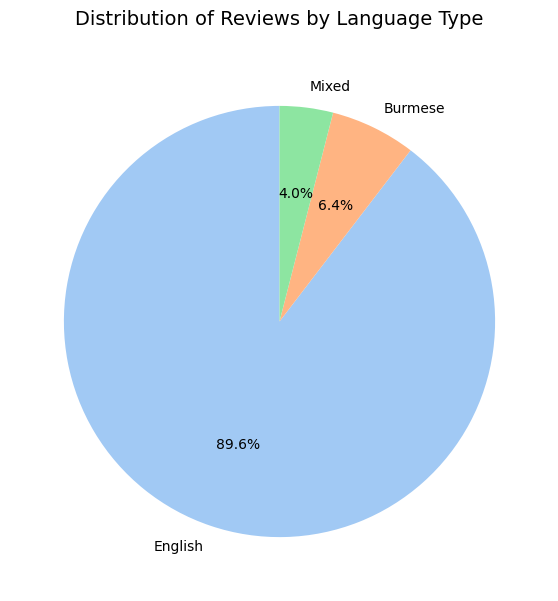

In [6]:
# 4. GENERATE CHARTS

# --- CHART 1: PIE CHART (Language Distribution) ---
plt.figure(figsize=(7, 7))
plt.pie(
    language_counts,
    labels=language_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel")
)
plt.title('Distribution of Reviews by Language Type', fontsize=14, pad=20)
plt.savefig('language_distribution_pie_chart.png')
plt.show()

In [8]:
# 3. CALCULATE DATA POINTS
# A. Frequency data for Pie Chart
sentiment_counts = df['Sentiment_Category'].value_counts()

In [9]:
# B. Average Rating data for Bar Chart
sentiment_avg_rating = df.groupby('Sentiment_Category')['Rating'].mean().round(2).reset_index()

# Ensure consistent order: Negative, Neutral, Positive
order = ['Negative', 'Neutral', 'Positive']
sentiment_avg_rating['Sentiment_Category'] = pd.Categorical(sentiment_avg_rating['Sentiment_Category'], categories=order, ordered=True)
sentiment_avg_rating = sentiment_avg_rating.sort_values('Sentiment_Category')

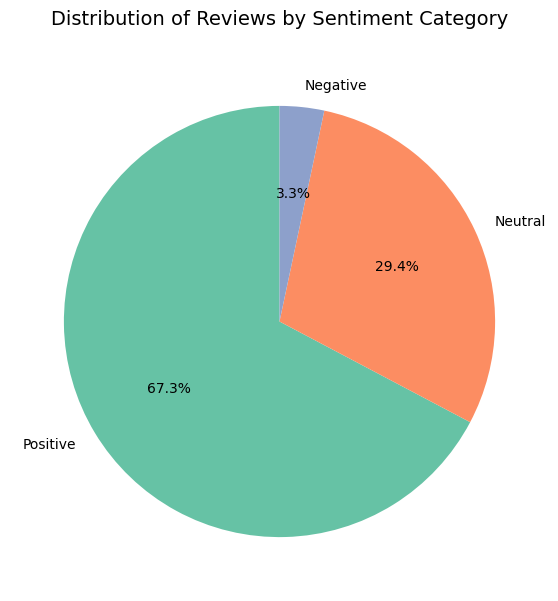

In [10]:
# --- CHART 1: PIE CHART (Sentiment Distribution) ---
plt.figure(figsize=(7, 7))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Set2")
)
plt.title('Distribution of Reviews by Sentiment Category', fontsize=14, pad=20)
plt.savefig('sentiment_distribution_pie_chart.png')
plt.show()